In [158]:
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

# 메모리 변수 제거

## [미션] wine의 데이터셋이해
- 레드와인과 화이트 와인의 alcohol, sugar, PHP의 관계 조사
- 이 자료의 class가 1이면 화이트 화인/0이면 레드와인임
  - alcohol: 그 주류의 도수
  - sugar: 설탕 농도
  - PHP: 와인 ph 농도

In [159]:
import pandas as pd
import numpy as np

wine1 = pd.read_csv('wine1.csv', sep='\t')
wine2 = pd.read_csv('wine2.csv', sep='\t')


In [160]:
from glob import glob
#glob('*')[0]
#pd.read_csv(glob('*.csv')[1], sep='\t')

In [161]:
df = wine1.merge(wine2,on='index')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6497 non-null   int64  
 1   alcohol   6497 non-null   float64
 2   class     6493 non-null   float64
 3   sugar_PH  6497 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 253.8+ KB


In [163]:
df.head()

,index,alcohol,class,sugar_PH
0,1,9.4,0.0,1.9/3.51
1,2,9.8,0.0,2.6/3.2
2,6498,9.8,0.0,2.3/3.26
3,4,9.8,0.0,1.9/3.16
4,5,9.4,0.0,1.9/3.51


In [164]:
df['class'].max(), df['class'].min() # 1과 0으로된 카테고리 변수

(1.0, 0.0)

In [165]:
df['sugar'] = df.sugar_PH.apply(lambda x: float(str(x).split('/')[0])) # sugar, ph 분류 후 새로운 열에 넣는다
df['PH'] = df.sugar_PH.apply(lambda x: float(str(x).split('/')[1]))

In [166]:
del df['sugar_PH'] # sugar_PH 뺸다

In [167]:
## 방법1 : 사용자가 변수를 직접 지정하고 일일이 명령어를 작업
df['sugar']=df['sugar'].astype('float64')
df['PH']=df['PH'].astype('float64')

## 방법2: 공통된 기능을 수행하는 변수명을 모아서 for로 반복함. 또는 사용자정의 함수 작성해도 됨
col=['sugar','PH']
for x in col:
    df[x]=df[x].astype('float64')
df.info()


## 방법3: 만약에object 관련 모든 변수를 숫자로 변형한다면 아래와 같이 작업
for x in df.columns:
    if df[x].dtype=='object':
        df[x]=df[x].astype('float64')

## 방법4: 방법3을 압축한 형식
[df[x].astype('float64') if df[x].dtype=='object' else x for x in df.columns]   # 방법4-1
[df[x].astype('float64') for x in df.columns  if df[x].dtype=='object']         # 방법4-2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    6497 non-null   int64  
 1   alcohol  6497 non-null   float64
 2   class    6493 non-null   float64
 3   sugar    6497 non-null   float64
 4   PH       6497 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 304.5 KB


[]

In [168]:
# NUll값 채움
## class의 결측치를 0으로 치환하고자 함.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

#  모든 숫자변수의 결측치를 0으로 채우기
df[df.select_dtypes(include=numerics).columns] =df[df.select_dtypes(include=numerics).columns].fillna(0)


In [169]:
df.head()

,index,alcohol,class,sugar,PH
0,1,9.4,0.0,1.9,3.51
1,2,9.8,0.0,2.6,3.20
2,6498,9.8,0.0,2.3,3.26
3,4,9.8,0.0,1.9,3.16
4,5,9.4,0.0,1.9,3.51


In [170]:
df.isna().sum() #클래스에 널값이 있다

index      0
alcohol    0
class      0
sugar      0
PH         0
dtype: int64

In [171]:
df.info()
# 각 값들이 float 형태이다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    6497 non-null   int64  
 1   alcohol  6497 non-null   float64
 2   class    6497 non-null   float64
 3   sugar    6497 non-null   float64
 4   PH       6497 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 304.5 KB


In [172]:
df[df['class'].isna()] = df[df['class'].isna()].fillna(0) # class의 널값들을 0으로 바꾸어서 넣는다. 즉 결측치를 0으로 넣는다

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    6497 non-null   int64  
 1   alcohol  6497 non-null   float64
 2   class    6497 non-null   float64
 3   sugar    6497 non-null   float64
 4   PH       6497 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 304.5 KB


## 시각화

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
df.drop(columns='index')

,alcohol,class,sugar,PH
0,9.4,0.0,1.9,3.51
1,9.8,0.0,2.6,3.20
2,9.8,0.0,2.3,3.26
3,9.8,0.0,1.9,3.16
4,9.4,0.0,1.9,3.51
...,...,...,...,...
6492,11.2,1.0,1.6,3.27
6493,9.6,1.0,8.0,3.15
6494,9.4,1.0,1.2,2.99
6495,12.8,1.0,1.1,3.34


<AxesSubplot:>

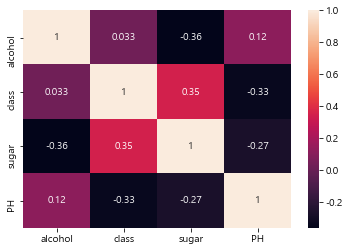

In [176]:
sns.heatmap(df.drop(columns='index').corr(), annot=True)

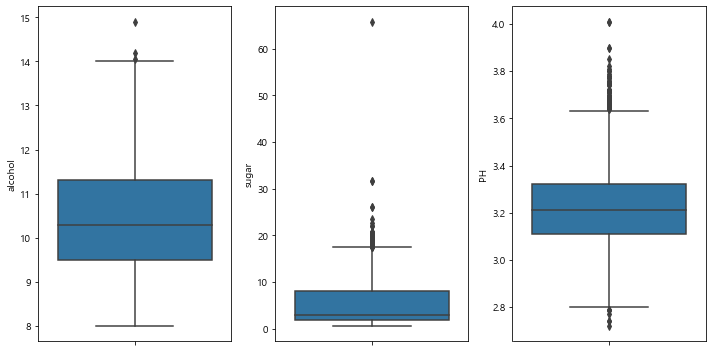

In [177]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
sns.boxplot(y = 'alcohol', data=df, ax=ax[0])
sns.boxplot(y= 'sugar', data=df, ax=ax[1])
sns.boxplot(y= 'PH', data=df, ax=ax[2])
fig.tight_layout()
# 박스플롯 형태로 보았다

<AxesSubplot:xlabel='PH', ylabel='Count'>

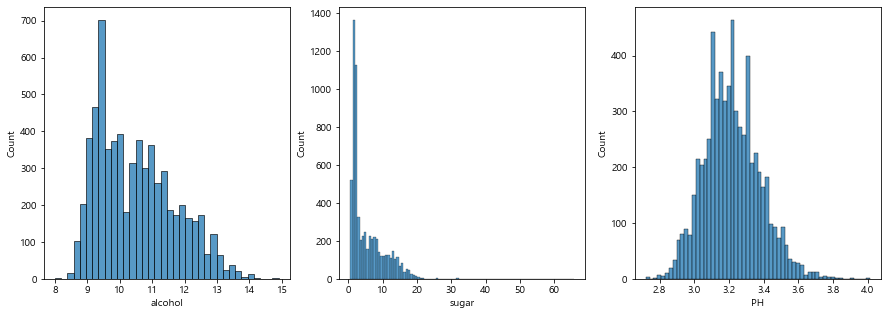

In [178]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df, x='alcohol', ax=ax[0])
sns.histplot(data=df, x='sugar', ax=ax[1])
sns.histplot(data=df, x='PH', ax=ax[2])
#히스토그램

<AxesSubplot:xlabel='PH', ylabel='Density'>

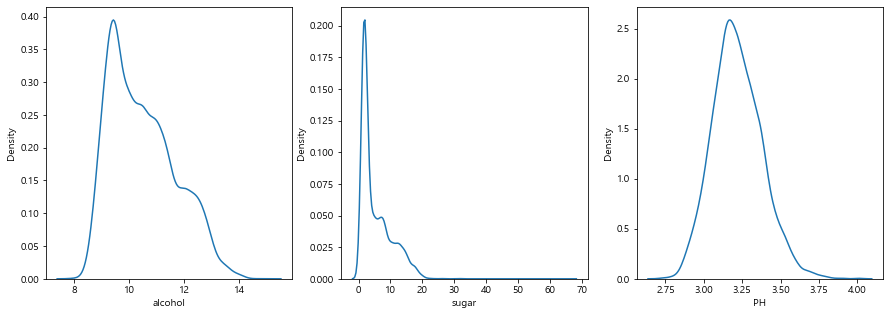

In [179]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(data=df, x='alcohol', ax=ax[0])
sns.kdeplot(data=df, x='sugar', ax=ax[1])
sns.kdeplot(data=df, x='PH', ax=ax[2])
#히스토그램

<AxesSubplot:xlabel='PH', ylabel='Count'>

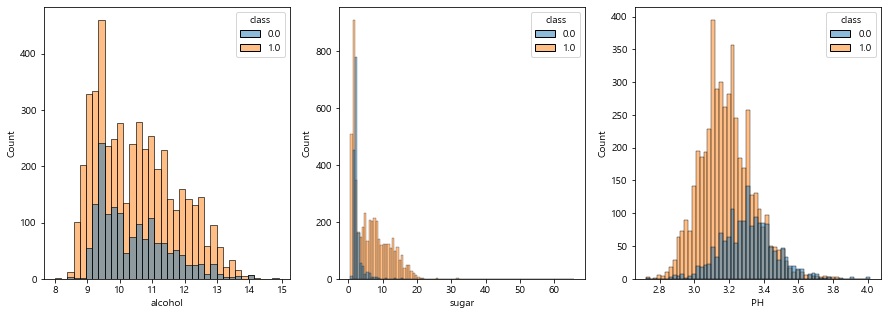

In [180]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df, x='alcohol', ax=ax[0], hue='class')
sns.histplot(data=df, x='sugar', ax=ax[1], hue='class')
sns.histplot(data=df, x='PH', ax=ax[2], hue='class')
#hue 추가 히스토그램

<AxesSubplot:xlabel='sugar', ylabel='Count'>

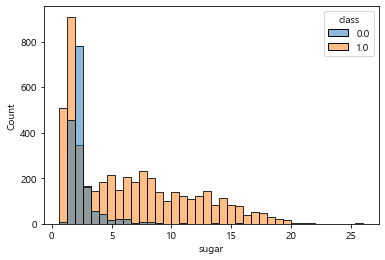

In [181]:
sns.histplot(data=df[df.sugar<30], x='sugar', hue='class')
# sugar가 30 밑일때 히스토그램

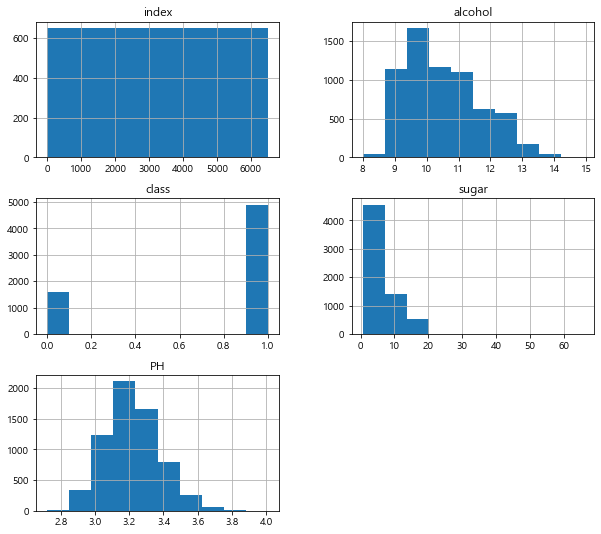

In [182]:
df.hist(figsize=(10,9))
plt.show()
# hist 써봄

In [183]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

Text(0.5, 1.0, '상관계수 : -0.26731983687681143')

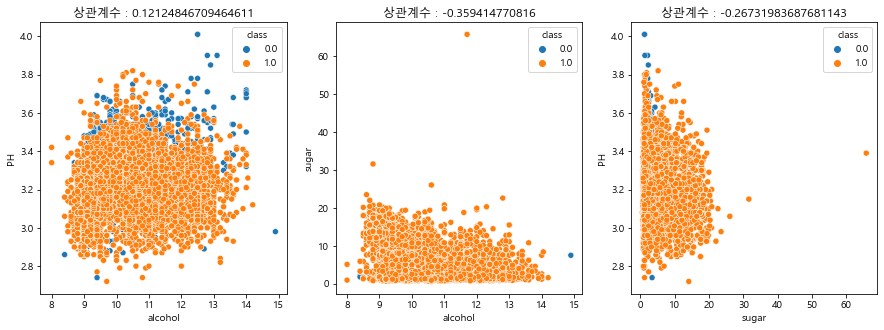

In [184]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x='alcohol', y='PH', hue='class', ax=ax[0])
ax[0].set_title(f"상관계수 : {df.alcohol.corr(df['PH'])}")

sns.scatterplot(data=df, x='alcohol', y='sugar', hue='class', ax=ax[1])
ax[1].set_title(f"상관계수 : {df.alcohol.corr(df['sugar'])}")

sns.scatterplot(data=df, x='sugar', y='PH', hue='class', ax=ax[2])
ax[2].set_title(f"상관계수 : {df.sugar.corr(df['PH'])}")

#산점도 
# 산점도와 상관계수 확인 결과 서로 연관도가 낮음을 확인

Text(0.5, 1.0, '상관계수 : -0.32912865072599995')

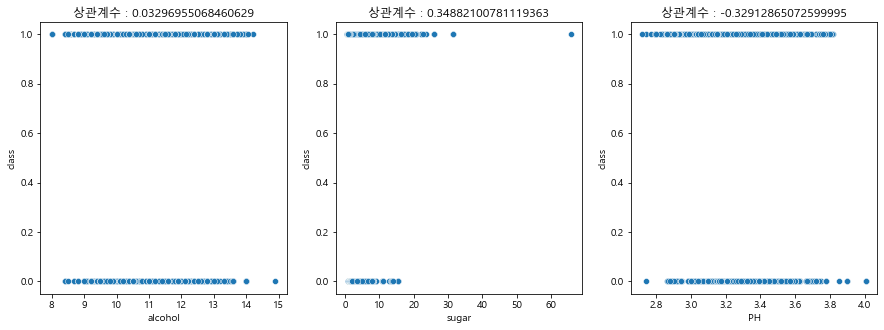

In [185]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x='alcohol', y='class', ax=ax[0])
ax[0].set_title(f"상관계수 : {df.alcohol.corr(df['class'])}")

sns.scatterplot(data=df, x='sugar', y='class', ax=ax[1])
ax[1].set_title(f"상관계수 : {df.sugar.corr(df['class'])}")

sns.scatterplot(data=df, x='PH',  y='class', ax=ax[2])
ax[2].set_title(f"상관계수 : {df.PH.corr(df['class'])}")
#상관도 낮음 
#애초에 카테고리여서 알기 힘듬

## x,y 데이터 분할

In [186]:
df.head()

,index,alcohol,class,sugar,PH
0,1,9.4,0.0,1.9,3.51
1,2,9.8,0.0,2.6,3.20
2,6498,9.8,0.0,2.3,3.26
3,4,9.8,0.0,1.9,3.16
4,5,9.4,0.0,1.9,3.51


In [187]:
y = df['class']
X = df[['alcohol', 'sugar', 'PH']]

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
train_sclaer = scaler.transform(X_train)
test_scaler = scaler.transform(X_test)


In [190]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
# 단항 로지스틱으로 실행된다
# 단항이므로 시그모이드 함수로 실행
# 반복분류는 max_iter, defalut 값 100
# l2가 defalut

In [191]:
train_sclaer.shape, y_train.shape

((4547, 3), (4547,))

In [192]:
log_model.fit(train_sclaer, y_train)

LogisticRegression()

In [193]:
pred = log_model.predict(test_scaler)

In [194]:
from sklearn.metrics import accuracy_score, classification_report

In [195]:
print(log_model.score(train_sclaer, y_train))
print(log_model.score(test_scaler, y_test))

0.7864526061139213
0.778974358974359


In [196]:
accuracy_score(y_test, pred)  

0.778974358974359

In [197]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.55      0.38      0.45       462
         1.0       0.82      0.90      0.86      1488

    accuracy                           0.78      1950
   macro avg       0.69      0.64      0.66      1950
weighted avg       0.76      0.78      0.76      1950



In [198]:
log_model.coef_, log_model.intercept_

(array([[ 0.53757328,  1.66703606, -0.75473532]]), array([1.78100605]))

In [199]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
print('acc %2.3f'%accuracy_score(y_test, pred))
print('pre %2.3f'%precision_score(y_test, pred))
print('rec %2.3f'%recall_score(y_test, pred))

acc 0.779
pre 0.824
rec 0.903


In [200]:
np.array(pred) - np.array(y_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [201]:
pred

array([1., 1., 1., ..., 1., 1., 1.])

In [226]:

count=0
for i, j in zip(pred, y_test):
    if i==j:
        count +=1
count=0
for x in pred-y_test:
    if x==0:
        count +=1
print(count/len(pred))

#------------------------
tmp = []
for x in pred - y_test:
    tmp.append(x)
print(tmp.count(0)/len(pred))

#------------------------
tmp =[]
tmp = [x for x in pred-y_test]
print(tmp.count(0)/len(pred))

0.778974358974359
0.778974358974359
0.778974358974359


### 참고예측

In [234]:
#참고에측
# new_x 를 만들어 스켕일 하고 예측하는것
# alcohol, sugar, PH값
new_x = np.array([
    [15, 30, 1.5]
])
newx_scaler = scaler.transform(new_x)
y_hat = log_model.predict(newx_scaler)
log_model.predict_proba(newx_scaler)

array([[1.16160814e-09, 9.99999999e-01]])

In [203]:
import statsmodels.api as sm

logitreg = sm.Logit(y_train, X_train)
logitreg_fit = logitreg.fit()

results=logitreg_fit.summary()
results

Optimization terminated successfully.
         Current function value: 0.435423
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4544
Method:                           MLE   Df Model:                            2
Date:                Thu, 23 Sep 2021   Pseudo R-squ.:                  0.2258
Time:                        13:53:15   Log-Likelihood:                -1979.9
converged:                       True   LL-Null:                       -2557.2
Covariance Type:            nonrobust   LLR p-value:                1.828e-251
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.6019      0.036     16.664      0.000       0.531       0.673
sugar          0.3879      0.017     22.354      0.000       0.354       0.422
PH            -2.0781      0.120    -17.309      0.000      -2.313      -1.843
==============================================================================
"""

In [204]:
import numpy as np
np.exp(logitreg_fit.params)   
# 해석: alcohol값이 1 증가할때마다 class가 1이 될 확률이 1.8배 증가함.

alcohol    1.825515
sugar      1.473817
PH         0.125162
dtype: float64

## 혼돈행렬, 분류리포트

In [205]:
print(classification_report(y_test, pred))
#리포트

              precision    recall  f1-score   support

         0.0       0.55      0.38      0.45       462
         1.0       0.82      0.90      0.86      1488

    accuracy                           0.78      1950
   macro avg       0.69      0.64      0.66      1950
weighted avg       0.76      0.78      0.76      1950



In [206]:
from sklearn.metrics import confusion_matrix

In [207]:
cm =  confusion_matrix(y_test, pred)#???
cm

array([[ 176,  286],
       [ 145, 1343]], dtype=int64)

In [237]:
pd.DataFrame(cm, index=['실제값(N:0)', '실제값(P:1)'], columns=['예측값(N:0)', '예측값(P:1)'])

,예측값(N:0),예측값(P:1)
실제값(N:0),176,286
실제값(P:1),145,1343


In [241]:
## 중요
tmp = []
pred = log_model.predict(test_scaler)

for i, j in zip(y_test, pred):
    tmp.append(str(int(i))+str(int(j)))

tmpdf = pd.DataFrame({ 'y' : y_test, 'y_hat':pred, '실제값/예측값':tmp})
tmpdf.groupby(['실제값/예측값']).count()

,y,y_hat
실제값/예측값,,
00,176,176
01,286,286
10,145,145
11,1343,1343


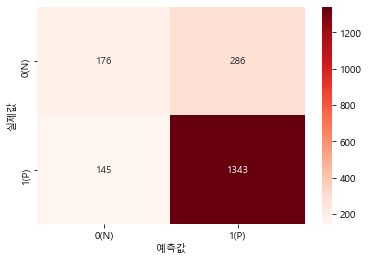

In [236]:
import warnings
warnings.filterwarnings(action='ignore')


import matplotlib.pyplot as plt
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])
plt.show()


In [243]:
 log_model.predict_proba(test_scaler) #0일 확률, 1일 확률

array([[0.00406839, 0.99593161],
       [0.09466176, 0.90533824],
       [0.04207767, 0.95792233],
       ...,
       [0.27003759, 0.72996241],
       [0.06881378, 0.93118622],
       [0.14938301, 0.85061699]])

In [244]:
pred_proba = log_model.predict_proba(test_scaler)
print(pred_proba[12:18])

print(log_model.predict(test_scaler[12:18]))

for x in pred_proba[12:18]:
    if x[0] > x[1]:
        print(0)
    else:
        print(1)

[[0.01317099 0.98682901]
 [0.01445371 0.98554629]
 [0.2177584  0.7822416 ]
 [0.44573257 0.55426743]
 [0.56061457 0.43938543]
 [0.37249312 0.62750688]]
[1. 1. 1. 1. 0. 1.]
1
1
1
1
0
1


In [245]:
## 재현율을 높여봅니다.
# predict_proba 분류결정 예측 확률을 반환

pred_proba = log_model.predict_proba(test_scaler)
pred  = log_model.predict(test_scaler)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (1950, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.00406839 0.99593161]
 [0.09466176 0.90533824]
 [0.04207767 0.95792233]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.00406839 0.99593161 1.        ]
 [0.09466176 0.90533824 1.        ]
 [0.04207767 0.95792233 1.        ]]


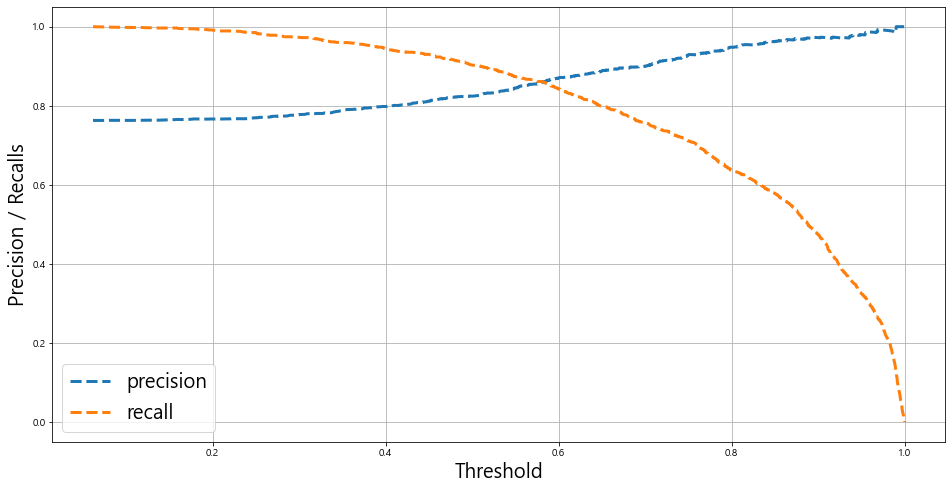

In [210]:
from sklearn.metrics import precision_recall_curve

pred_probs_1 = log_model.predict_proba(test_scaler)[: ,1] #0일 확률, 1일 확률
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_probs_1)


plt.figure(figsize=(16,8))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', linewidth=3, label='precision')
plt.plot(thresholds, recalls[0:threshold_boundary], linestyle='--', linewidth=3, label='recall')

start, end = plt.xlim()

plt.xlabel('Threshold', fontsize=20)
plt.ylabel('Precision / Recalls', fontsize=20)
plt.legend(loc='lower left', fontsize=20)

plt.grid()
plt.show()
# precision 은 예측트루 = 실제트루 / 예측 트루값
# recall  예측 트루 = 실제 트루 / 실제 트루값
# 아직도 완벽하게 이해는 안된다 하..
# 0.6 정도일때 정확한것같다

In [ ]:
### 코드
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print(' 정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision ,recall))
    
    # 리포트 출력
    #cm=confusion_matrix(test_y, lr.predict(test_scaled))


In [ ]:
## 임께값 변경
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold_list = [0.3,0.5,0.8]

for custom_threshold in custom_threshold_list:
    print('------ custom_threshold_list----- %2.1f' % custom_threshold)
    # predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
    pred_proba = log_model.predict_proba(test_scaler)
    pred  = log_model.predict(test_scaler)

    pred_proba_1 = pred_proba[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
    custom_predict = binarizer.transform(pred_proba_1)
    custom_predict    
    #get_clf_eval(test_y, )

    
    get_clf_eval(test_y,custom_predict)
    
    #from sklearn.metrics import confusion_matrix


## 리지 라쏘

In [211]:
model_r = LogisticRegression(penalty='l1', solver='liblinear')


In [212]:
train_sclaer.shape, y_train.shape

((4547, 3), (4547,))

In [213]:
model_r.fit(train_sclaer, y_train)
pred_r = model_r.predict(test_scaler)
print('정확도는', accuracy_score(y_test, pred_r))

정확도는 0.778974358974359


In [214]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()
model_RFC.fit(train_sclaer, y_train)
pred_RFC = model_RFC.predict(test_scaler)
accuracy_score(y_test, pred_RFC)


0.8861538461538462

In [215]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(train_sclaer, y_train)
pred_xg = model_RFC.predict(test_scaler)
accuracy_score(y_test, pred_xg)

[13:53:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\TH\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8861538461538462